diffloop self done

In [15]:
import glob,sys,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
save_dir = '../data/processed/fig2_hichip/hichip_diffloop'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [5]:
loop_files = glob.glob('../data/interim/merged/loops/*csv')
loop_files

['../data/interim/merged/loops/SL_D2.loops.csv',
 '../data/interim/merged/loops/Astrocytes.loops.csv',
 '../data/interim/merged/loops/SLC_D2.loops.csv',
 '../data/interim/merged/loops/H9_D0.loops.csv',
 '../data/interim/merged/loops/SL_D0.loops.csv',
 '../data/interim/merged/loops/SLC_D0.loops.csv',
 '../data/interim/merged/loops/H9_D10.loops.csv',
 '../data/interim/merged/loops/H9_D2.loops.csv',
 '../data/interim/merged/loops/H9_D28.loops.csv']

# make loop_file object

In [28]:
%%time
loop_df_all = pd.DataFrame(columns = ['tissue', 'loop_name', 'count'])
for loop_file in loop_files:
    tissue = os.path.basename(loop_file).split('.')[0]
    print(tissue, loop_file)
    loop_df = pd.read_csv(loop_file, index_col=0)
    loop_df['loop_name'] = loop_df.source + '::' + loop_df.target
    loop_df['tissue'] = tissue
    loop_df_all = pd.concat([loop_df_all, loop_df[['tissue', 'loop_name','count']]],axis=0,sort=False)
    print(loop_df.shape, loop_df_all.shape)

SL_D2 ../data/interim/merged/loops/SL_D2.loops.csv
(5324429, 5) (5324429, 3)
Astrocytes ../data/interim/merged/loops/Astrocytes.loops.csv
(1839205, 5) (7163634, 3)
SLC_D2 ../data/interim/merged/loops/SLC_D2.loops.csv
(4282155, 5) (11445789, 3)
H9_D0 ../data/interim/merged/loops/H9_D0.loops.csv
(1318716, 5) (12764505, 3)
SL_D0 ../data/interim/merged/loops/SL_D0.loops.csv
(1187599, 5) (13952104, 3)
SLC_D0 ../data/interim/merged/loops/SLC_D0.loops.csv
(2659082, 5) (16611186, 3)
H9_D10 ../data/interim/merged/loops/H9_D10.loops.csv
(712533, 5) (17323719, 3)
H9_D2 ../data/interim/merged/loops/H9_D2.loops.csv
(6720106, 5) (24043825, 3)
H9_D28 ../data/interim/merged/loops/H9_D28.loops.csv
(1256959, 5) (25300784, 3)
CPU times: user 1min 6s, sys: 3.74 s, total: 1min 10s
Wall time: 51 s


aside: make sure source < target w.r.t to genome coord

In [20]:
# source_df = loop_df.source.str.split('_',expand =True)
# target_df = loop_df.target.str.split('_',expand =True)
# width = target_df.iloc[:,1].map(int) - source_df.iloc[:,1].map(int)
# width.describe()

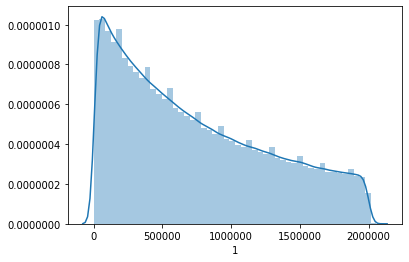

In [16]:
sns.distplot(width)

end aside

In [30]:
# takes awhile
loop_df_all_piv = loop_df_all.pivot(index='loop_name', columns='tissue', values='count')
loop_df_all_piv.fillna(0,inplace=True)


In [33]:
loop_df_all_piv.shape

(10928529, 9)

In [36]:
loop_df_all_piv.to_csv(os.path.join(save_dir, 'loop_df_all_piv.csv'))

In [38]:
loop_df_all_piv.sum(axis=0)


tissue
Astrocytes     7076509
H9_D0          2818710
H9_D10         1353376
H9_D2         52416282
H9_D28         1925181
SLC_D0         8635019
SLC_D2        18073215
SL_D0          2492090
SL_D2         28480621
dtype: int64

In [37]:
%%time
loop_df_all_piv_tissuenorm = loop_df_all_piv/loop_df_all_piv.sum(axis=0)
loop_df_all_piv_tissuenorm.to_csv(os.path.join(save_dir, 'loop_df_all_piv_tissuenorm.csv'))

CPU times: user 1min 43s, sys: 4.45 s, total: 1min 47s
Wall time: 1min 44s


In [45]:
loop_df_all_piv_tissuenorm.columns#pop('loop_name')

Index(['Astrocytes', 'H9_D0', 'H9_D10', 'H9_D2', 'H9_D28', 'SLC_D0', 'SLC_D2',
       'SL_D0', 'SL_D2'],
      dtype='object', name='tissue')

MemoryError: Unable to allocate array with shape (59716367587656,) and data type float64

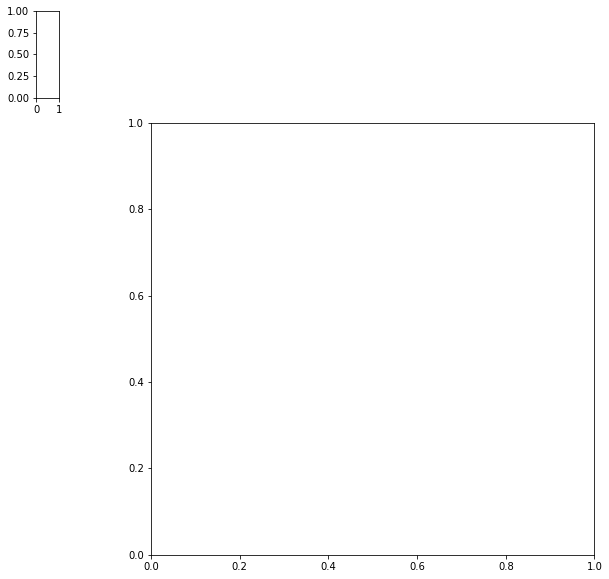

In [41]:
sns.clustermap(loop_df_all_piv_tissuenorm)